In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_1 = cv2.imread('/home/anas/Downloads/image-3.jpeg')
cv2.imshow('original',img_1)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

img_gray = cv2.imread('/home/anas/Downloads/image-3.jpeg',cv2.IMREAD_GRAYSCALE)
cv2.imshow('gray',img_gray)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()


(320, 606)


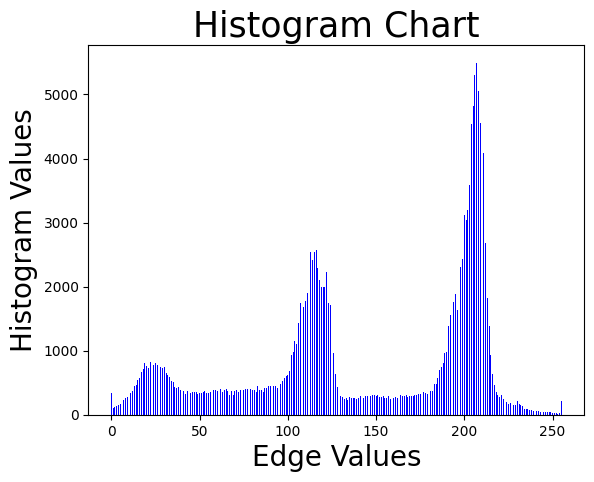

In [8]:
gray_img_arr = np.asarray(img_gray)
print (img_gray.shape)
img_3_flat = gray_img_arr.flatten()
hist = np.bincount(img_3_flat,minlength=256)
x=np.array(range(256+1))
plt.xlabel('Edge Values', fontsize=20)
plt.ylabel('Histogram Values', fontsize=20)
plt.title('Histogram Chart', fontsize=25)
plt.bar(x[:-1], hist, width=0.5, color='blue')
plt.show()

In [10]:
my_img = []
for i in img_3_flat:
    if i <120:
        my_img.append(0)
    elif i >= 120:
        my_img.append(255)
my_img = np.array(my_img)
my_img = my_img.astype(int)


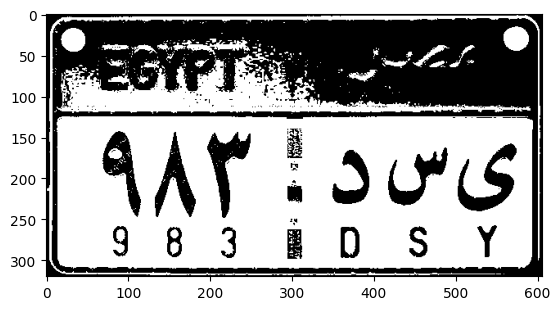

In [17]:

my_img = np.array(my_img,dtype=np.uint8)
my_img = np.reshape(my_img,img_gray.shape)
plt.imshow(my_img,cmap='gray')
cv2.imshow('new img',my_img)
cv2.imwrite("theshold_img_3.png", my_img)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

True

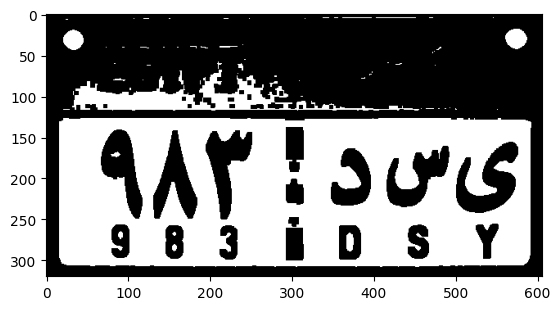

In [16]:
m,n = my_img.shape
k=5
kernel= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2

img_erroded= np.zeros((m,n),dtype=np.uint8)
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= my_img[i-constant:i+constant+1, j-constant:j+constant+1]
    product= temp*kernel
    img_erroded[i,j]= np.min(product)
plt.imshow(img_erroded,cmap="gray")
cv2.imwrite("Eroded3.png", img_erroded)